In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [45]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'rothera'


df = pd.read_csv(f'./data/data_{station}/{station}_clean.csv')

cols = [col for col in df.columns]


df['date'] = pd.to_datetime(df_copy['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273593 entries, 0 to 273592
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   date    168528 non-null  datetime64[ns, UTC]
 1   temp    273271 non-null  float64            
 2   dir     270322 non-null  float64            
 3   vel     272955 non-null  float64            
 4   hr      269552 non-null  float64            
 5   pres    273375 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 12.5 MB


In [46]:
cols = df.columns
cols

Index(['date', 'temp', 'dir', 'vel', 'hr', 'pres'], dtype='object')

In [33]:
# date,temp,skt,dir,vel,hr,prec,pres

columns_to_drop = [
'temp_palmer',
       'dir_palmer', 'vel_palmer', 'hr_palmer', 'prec_palmer', 'pres_palmer'
    ]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76704 entries, 0 to 76703
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    76704 non-null  datetime64[ns, UTC]
 1   temp    57069 non-null  float64            
 2   dir     57048 non-null  float64            
 3   vel     57048 non-null  float64            
 4   hr      57069 non-null  float64            
 5   prec    1020 non-null   float64            
 6   pres    56396 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 4.1 MB


In [47]:
df = df[df['date'].dt.hour % 3 == 0]
df.head()

,date,temp,dir,vel,hr,pres
0,2005-01-01 00:00:00+00:00,1.1,350.0,16.0,97.0,999.6
3,2005-01-01 03:00:00+00:00,1.0,350.0,14.0,96.0,1000.4
6,2005-01-01 06:00:00+00:00,1.0,310.0,9.0,100.0,1002.1
9,2005-01-01 09:00:00+00:00,0.7,210.0,7.0,100.0,1003.7
12,2005-01-01 12:00:00+00:00,1.3,220.0,4.0,100.0,1005.4


temp
dir
vel
hr
pres


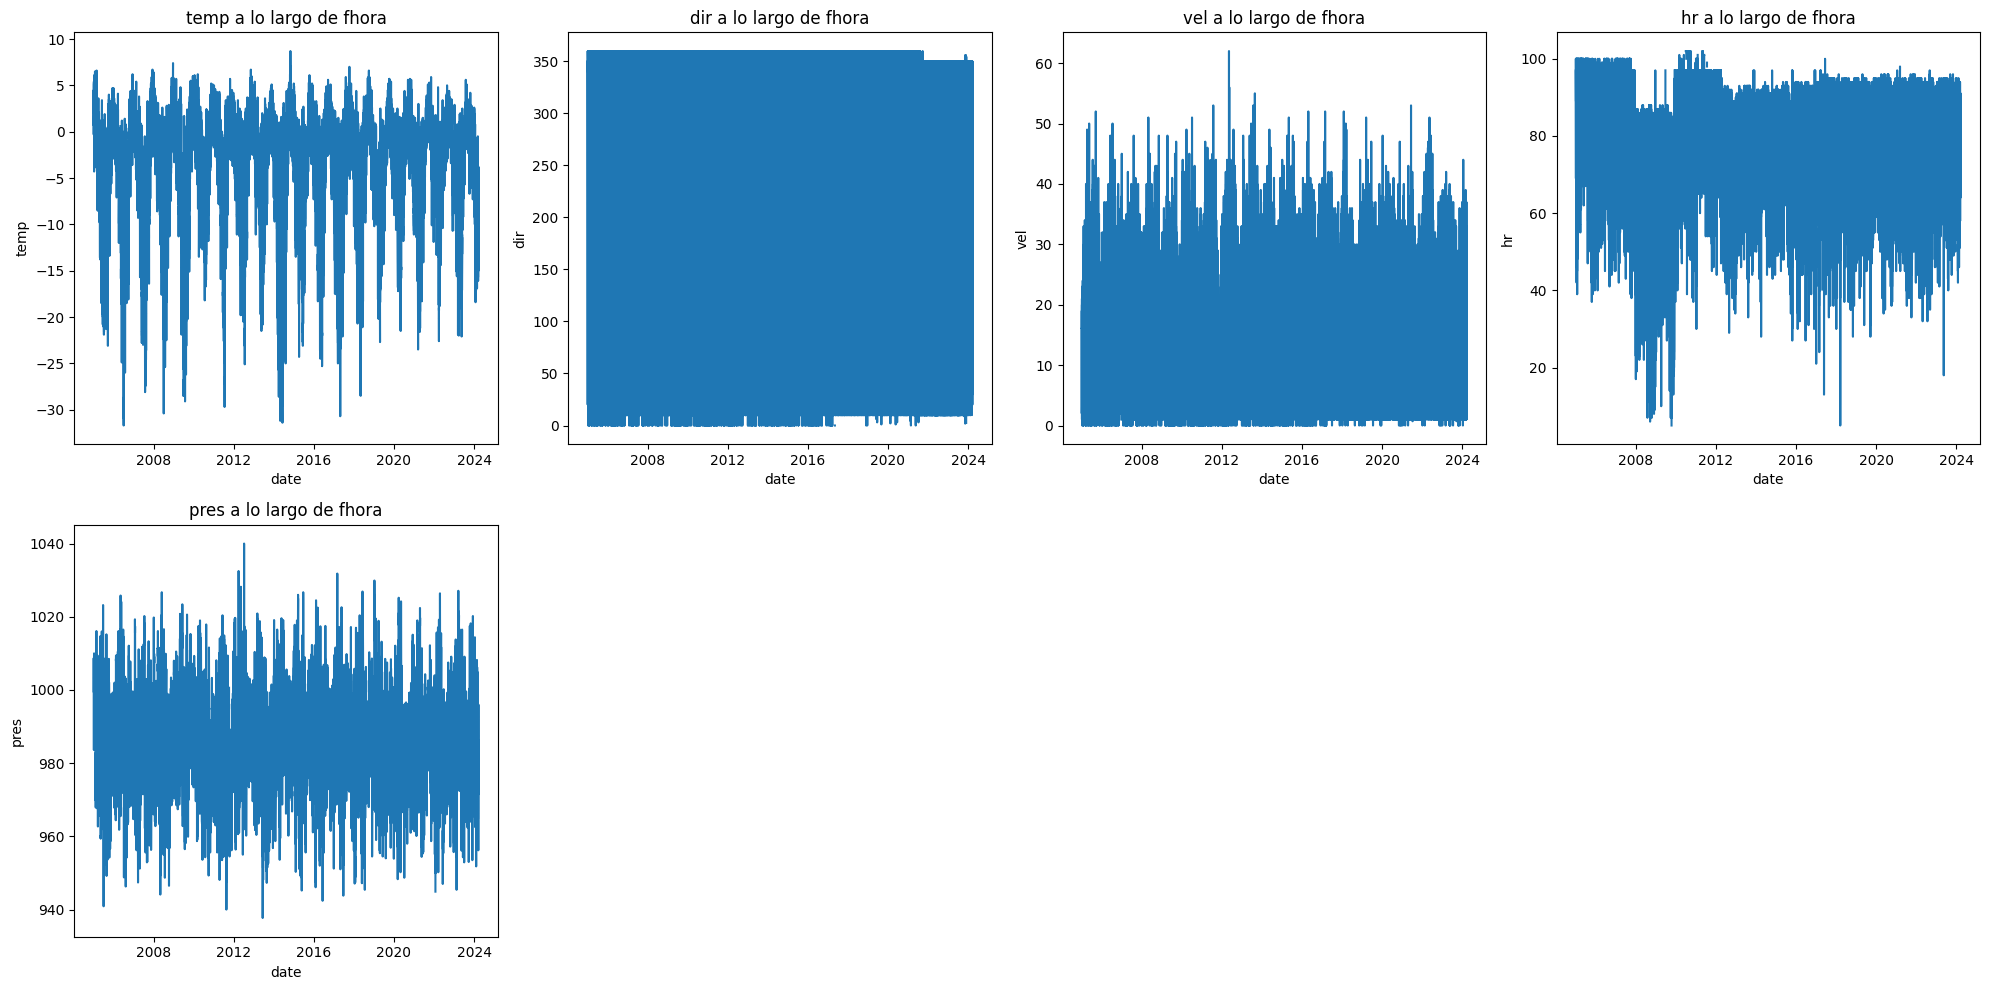

In [48]:
df['date'] = pd.to_datetime(df['date'])

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [6]:
plt.savefig(f'resource/eda_{station}.png')


<Figure size 640x480 with 0 Axes>

In [36]:
df.tail()

,date,temp,dir,vel,hr,prec,pres
76689,2013-10-01 09:00:00+00:00,1.4,342.0,3.94,0.0,NaN,996.3
76692,2013-10-01 12:00:00+00:00,1.4,28.0,10.61,0.0,NaN,994.7
76695,2013-10-01 15:00:00+00:00,-0.2,243.0,1.16,0.0,NaN,995.2
76698,2013-10-01 18:00:00+00:00,0.8,31.0,12.69,0.0,NaN,993.9
76701,2013-10-01 21:00:00+00:00,-0.7,196.0,4.84,0.0,NaN,994.7


### Acumulación de lluvia

In [51]:
df_lluvia = pd.read_csv(f'./data/data_{station}/{station}_clean.csv')

In [52]:

#! SUMA DE LA LLUVIA

df_resampled_sum = df_lluvia.copy()
if df_resampled_sum['date'].dtype != 'datetime64[ns]':
    df_resampled_sum['date'] = pd.to_datetime(df_resampled_sum['date'])

df_resampled_sum.set_index('date', inplace=True)
df_resampled_sum = df_resampled_sum.resample('3H').sum(min_count=1)
df_resampled_sum.reset_index(inplace=True)

df_resampled_sum.head(10)

df['prec'] = df_resampled_sum['prec']

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_3164\3728176753.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled_sum = df_resampled_sum.resample('3H').sum(min_count=1)


KeyError: 'prec'

In [39]:
df.head()

,date,temp,dir,vel,hr,prec,pres
0,2005-01-01 00:00:00+00:00,-2.4,293.0,8.04,87.0,NaN,980.9
3,2005-01-01 03:00:00+00:00,-4.1,265.0,6.57,91.0,NaN,985.2
6,2005-01-01 06:00:00+00:00,-4.5,302.0,5.78,84.0,NaN,988.8
9,2005-01-01 09:00:00+00:00,-5.3,308.0,2.30,78.0,NaN,990.5
12,2005-01-01 12:00:00+00:00,-5.4,68.0,0.00,67.0,NaN,991.2


temp
dir
vel
hr
pres


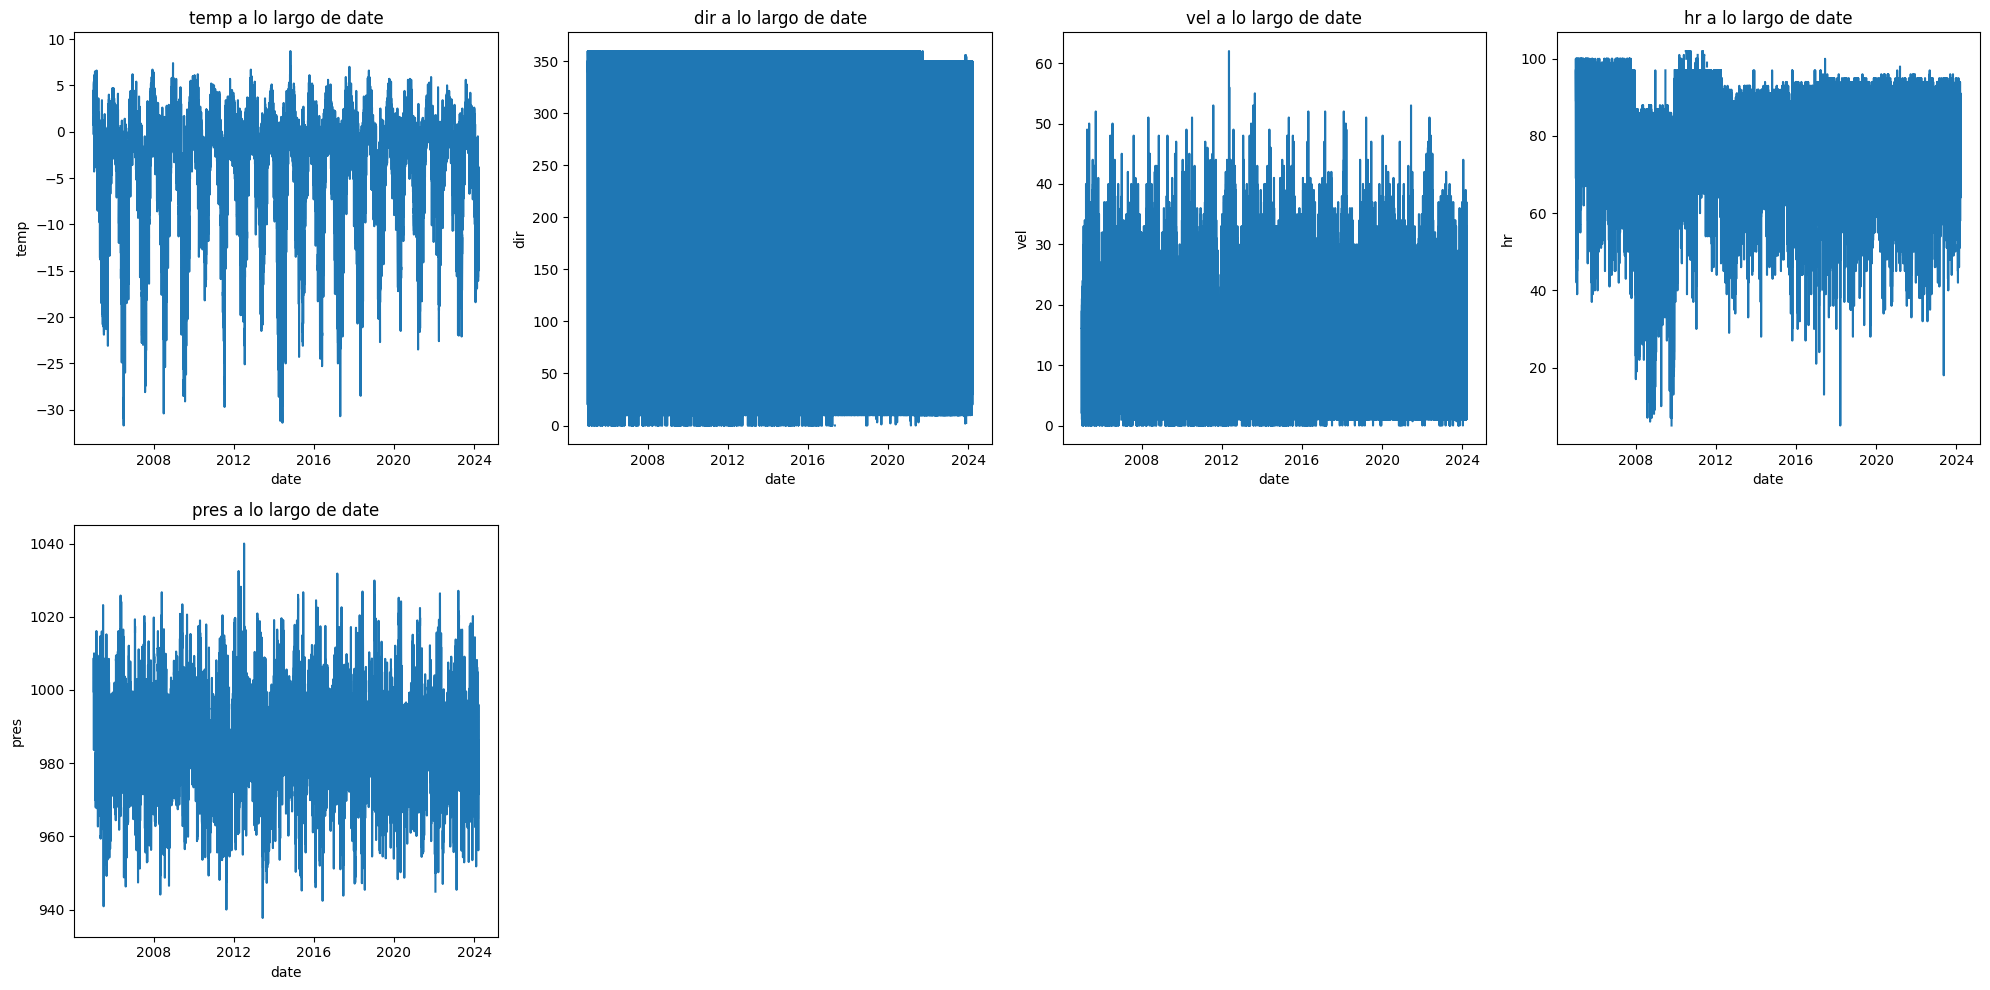

In [53]:



num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de date')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()

plt.savefig('resource/eda_{station}_2.png')
plt.show()

In [54]:

df.to_csv(f'./3h_data/3h_data_clean/{station}_clean.csv', index=False)